### Basic EDA for variables related to medical exams results
#### [107,108, 122-125, 127, 128, 130, 131, 133-135]

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading full dataset:

In [4]:
df = pd.read_csv('../data/raw/pluri_patients_2020.csv', sep = ';', decimal = ',')
df.head()

,edad,sexo,n_urg,n_hosp,n_cx,n_ce_med_general,n_ce_med_especializada,estancia_sala,estancia_uce,estancia_uci,...,tasa_de_filtración_glomerular_tfg,estadio_de_la_enfermedad_renal,microalbuminuria,tsh,clase_funcional,creatinina_2_consulta,tasa_de_filtración_glomerular_tfg3,cambio_de_tfg,úlcera_de_pie_diabético,estado_vital
0,29,F,1,1,0,3,9,2,0,0,...,NaN,Estadio 0,NaN,NaN,No clasificado,NaN,NaN,NaN,No,vivo
1,67,F,1,0,0,0,1,0,0,0,...,60.13,Estadio 2,3.02,5.77,Clase funcional 2B,0.86,60.13,0.0,No,vivo
2,83,M,1,0,0,4,3,0,0,0,...,NaN,Estadio 0,NaN,NaN,No clasificado,NaN,NaN,NaN,No,vivo
3,66,M,1,1,1,0,2,13,0,0,...,58.09,Estadio 3A,7.00,1.17,Clase funcional 4,0.00,0.00,0.0,No,fallecido
4,62,F,2,0,0,2,8,0,0,0,...,107.76,Estadio 1,68.00,2.89,Clase funcional 2B,0.00,0.00,0.0,No,vivo


In [7]:
df.shape

(5511, 137)

Defining a subset whit the variables of interest: 

In [8]:
variable_list = ['glicemia', 
'hemoglobina_glicada', 
'lipoproteina', 
'hdl', 
'colesterol_total', 
'trigliceridos', 
'creatinina_1_consulta', 
'tasa_de_filtración_glomerular_tfg', 
'microalbuminuria', 
'tsh', 
'creatinina_2_consulta', 
'tasa_de_filtración_glomerular_tfg3', 
'cambio_de_tfg']

sub_df = df.loc[:, df.columns.isin(variable_list)]
sub_df.head()

,glicemia,hemoglobina_glicada,lipoproteina,hdl,colesterol_total,trigliceridos,creatinina_1_consulta,tasa_de_filtración_glomerular_tfg,microalbuminuria,tsh,creatinina_2_consulta,tasa_de_filtración_glomerular_tfg3,cambio_de_tfg
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,151.09,7.88,66.27,41.34,142.03,172.08,0.86,60.13,3.02,5.77,0.86,60.13,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96.10,6.60,0.00,35.10,97.50,74.00,0.92,58.09,7.00,1.17,0.00,0.00,0.0
4,243.00,9.61,84.78,40.00,142.00,84.00,0.47,107.76,68.00,2.89,0.00,0.00,0.0


In [9]:
sub_df.shape

(5511, 13)

Exploring values in the subset: 

In [12]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5511 entries, 0 to 5510
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   glicemia                            4352 non-null   float64
 1   hemoglobina_glicada                 4352 non-null   float64
 2   lipoproteina                        4352 non-null   float64
 3   hdl                                 4352 non-null   float64
 4   colesterol_total                    4352 non-null   float64
 5   trigliceridos                       4352 non-null   float64
 6   creatinina_1_consulta               4352 non-null   float64
 7   tasa_de_filtración_glomerular_tfg   4352 non-null   float64
 8   microalbuminuria                    4352 non-null   float64
 9   tsh                                 4352 non-null   float64
 10  creatinina_2_consulta               4352 non-null   float64
 11  tasa_de_filtración_glomerular_tfg3  4352 no

In [10]:
_ = [print(x, ": ", sub_df[x].sort_values().unique(), "\n") for x in sub_df.columns]

glicemia :  [  0.     1.07   1.13 ... 990.   993.      nan] 

hemoglobina_glicada :  [  0.      3.      4.      4.11    4.19    4.33    4.4     4.41    4.5
   4.64    4.7     4.73    4.79    4.8     4.83    4.85    4.89    4.9
   4.91    4.92    4.93    4.94    4.98    4.99    5.      5.01    5.02
   5.03    5.04    5.05    5.06    5.07    5.08    5.09    5.1     5.11
   5.12    5.13    5.15    5.16    5.18    5.19    5.2     5.21    5.22
   5.23    5.24    5.25    5.26    5.27    5.28    5.29    5.3     5.31
   5.32    5.33    5.34    5.35    5.36    5.37    5.38    5.39    5.4
   5.41    5.42    5.43    5.44    5.45    5.46    5.47    5.48    5.49
   5.5     5.51    5.52    5.53    5.54    5.55    5.56    5.57    5.58
   5.59    5.6     5.61    5.62    5.63    5.64    5.65    5.66    5.67
   5.68    5.69    5.7     5.71    5.72    5.73    5.74    5.75    5.76
   5.77    5.78    5.79    5.8     5.81    5.82    5.83    5.84    5.85
   5.86    5.87    5.88    5.89    5.9     5.91    5.9

In [11]:
sub_df.describe()

,glicemia,hemoglobina_glicada,lipoproteina,hdl,colesterol_total,trigliceridos,creatinina_1_consulta,tasa_de_filtración_glomerular_tfg,microalbuminuria,tsh,creatinina_2_consulta,tasa_de_filtración_glomerular_tfg3,cambio_de_tfg
count,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000
mean,101.089072,5.019526,46.145967,41.347714,133.767780,123.940409,0.970905,59.186726,46.654304,2.644399,0.956250,42.426914,0.026721
std,114.898783,3.805773,47.725856,151.424763,67.504819,92.580687,0.948521,40.304276,305.177875,6.329633,4.617593,43.717118,2.626247
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-89.090000
25%,74.000000,4.797500,0.000000,31.900000,110.167500,72.730000,0.650000,36.007500,0.000000,0.030000,0.000000,0.000000,0.000000
50%,91.000000,5.900000,46.075000,40.100000,138.090000,111.080000,0.840000,54.100000,1.700000,1.810000,0.740000,40.755000,0.000000
75%,112.000000,6.660000,77.705000,49.325000,169.000000,161.692500,1.070000,77.580000,10.485000,3.402500,1.020000,65.112500,0.000000
max,993.000000,109.000000,439.000000,9922.000000,1798.000000,1299.000000,13.110000,578.470000,9886.750000,285.000000,140.000000,760.040000,65.170000


... ... ...

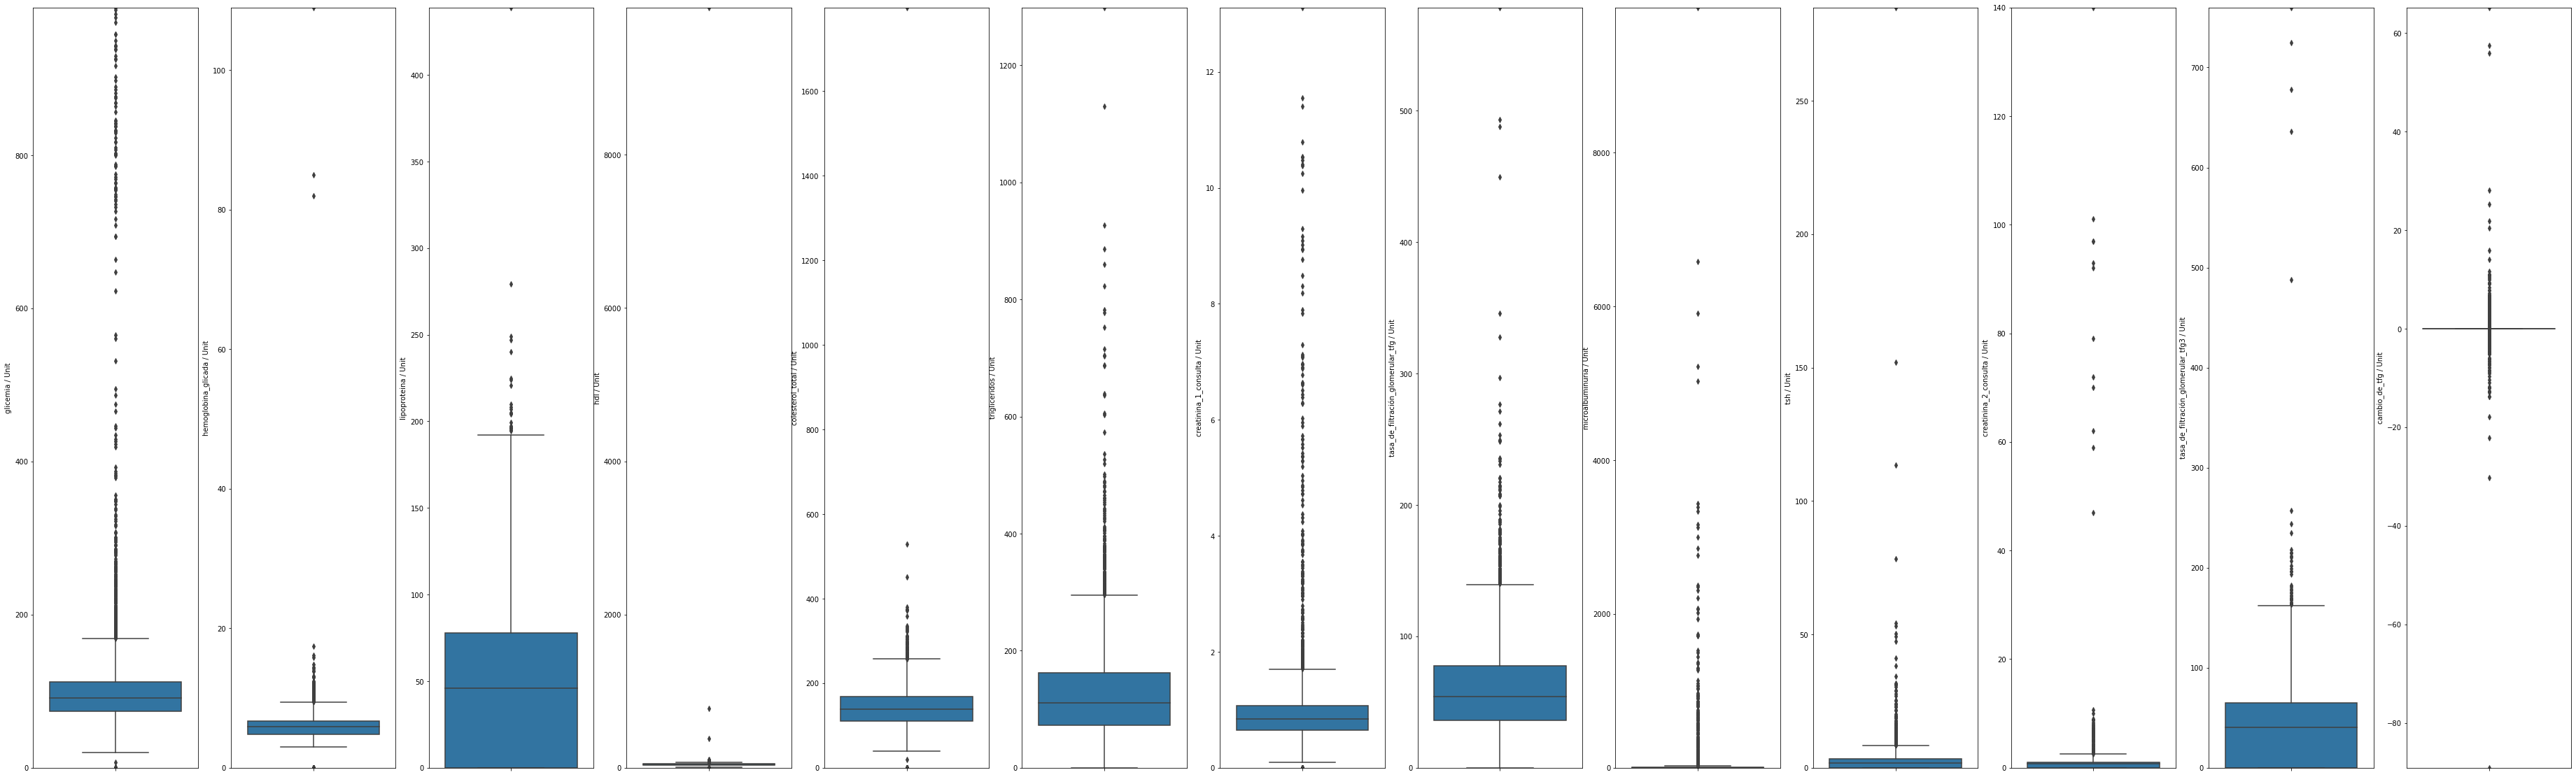

In [24]:
fig, axes = plt.subplots(1, len(variable_list))
for i, col in enumerate(variable_list):
    ax = sns.boxplot(y=sub_df[col], ax=axes.flatten()[i])
    ax.set_ylim(sub_df[col].min(), sub_df[col].max())
    ax.set_ylabel(col + ' / Unit')
plt.rcParams['figure.figsize'] = (78,26)
plt.show()